## Bootcamp-Project-4-Machine-Learning



In [657]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Choose a public dataset that needs to clean and preprocess.

In [658]:
DF = pd.read_csv('Train.csv')
DF


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


### Apply the essential EDA steps: head, shape, info, describe, and missing values.

In [659]:
DF.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [660]:
DF.shape

(10999, 12)

In [661]:
DF.info() # we have to convert each object to int 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [662]:
DF.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [663]:
DF.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

### Apply the additional EDA steps based on your dataset needs.

In [664]:
# for some reason there is no color here ):
bar_fig = px.bar(data_frame=DF, x='Warehouse_block',y='Reached.on.Time_Y.N', title='Warehouse Block Distribution',color='Warehouse_block')
bar_fig.show()

hist_fig = px.histogram(data_frame=DF, x='Customer_care_calls', title='Customer care calls')
hist_fig.show()

box_fig = px.box(data_frame=DF, y='Prior_purchases', title='Prior Purchases')
box_fig.show()

pie_fig = px.pie(data_frame=DF, names='Reached.on.Time_Y.N', title='Delivery on time')
pie_fig.show()


In [665]:
DF.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [666]:
#droping id 
DF = DF.drop('ID', axis=1)
print('shape:', DF.shape)
DF.columns

shape: (10999, 11)


Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [667]:
#what need to to be converted to numerical values for the machine learning 
print(DF['Product_importance'].unique())
print(DF['Warehouse_block'].unique())
print(DF['Gender'].unique())
print(DF['Mode_of_Shipment'].unique())

['low' 'medium' 'high']
['D' 'F' 'A' 'B' 'C']
['F' 'M']
['Flight' 'Ship' 'Road']


In [668]:
DF['Gender'] = DF['Gender'].map({'F': 0, 'M': 1})
DF['Gender'].unique()

array([0, 1])

In [669]:
DF['Warehouse_block'] = DF['Warehouse_block'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4})
DF['Warehouse_block'].unique()

array([3, 4, 0, 1, 2])

In [670]:
DF['Mode_of_Shipment'] = DF['Mode_of_Shipment'].map({'Flight': 2, 'Ship': 0, 'Road': 1})
DF['Mode_of_Shipment'].unique()

array([2, 0, 1])

In [671]:
DF['Product_importance'] = DF['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
DF['Product_importance'].unique()

array([0, 1, 2])

In [672]:
DF

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,2,4,2,177,3,0,0,44,1233,1
1,4,2,4,5,216,2,0,1,59,3088,1
2,0,2,2,2,183,4,0,1,48,3374,1
3,1,2,3,3,176,4,1,1,10,1177,1
4,2,2,2,2,184,3,1,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,0,0,4,1,252,5,1,0,1,1538,1
10995,1,0,4,1,232,5,1,0,6,1247,0
10996,2,0,5,4,242,5,0,0,4,1155,0
10997,4,0,5,2,223,6,1,1,2,1210,0


In [673]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      10999 non-null  int64
 1   Mode_of_Shipment     10999 non-null  int64
 2   Customer_care_calls  10999 non-null  int64
 3   Customer_rating      10999 non-null  int64
 4   Cost_of_the_Product  10999 non-null  int64
 5   Prior_purchases      10999 non-null  int64
 6   Product_importance   10999 non-null  int64
 7   Gender               10999 non-null  int64
 8   Discount_offered     10999 non-null  int64
 9   Weight_in_gms        10999 non-null  int64
 10  Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(11)
memory usage: 945.4 KB


<AxesSubplot:>

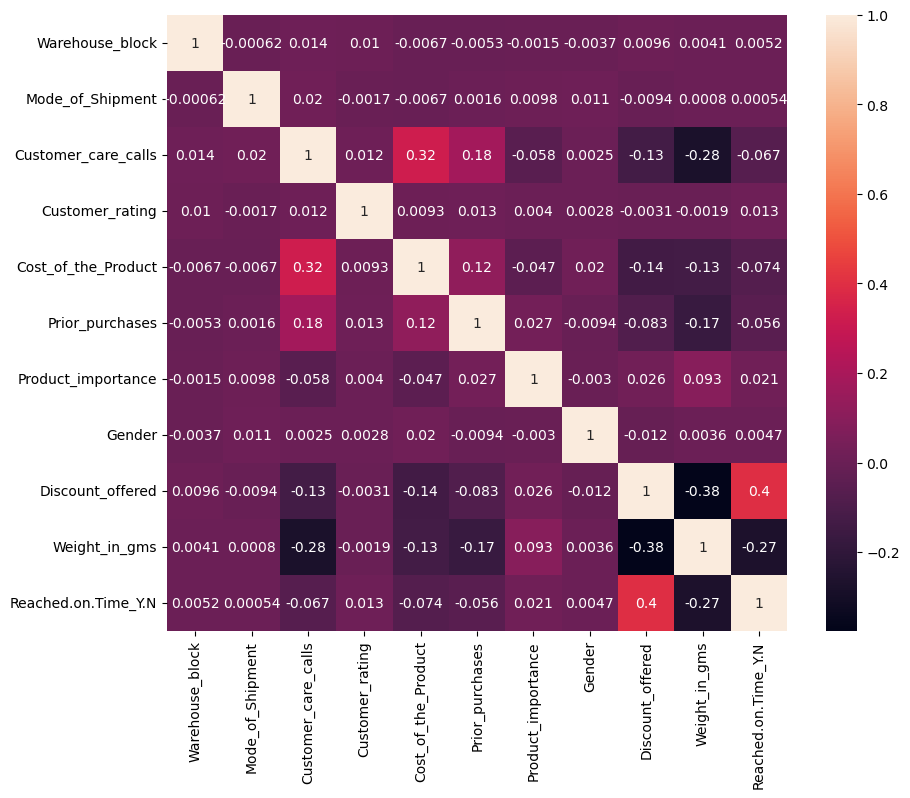

In [674]:
plt.figure(figsize=(10, 8))
sns.heatmap(DF.corr(),annot = True)

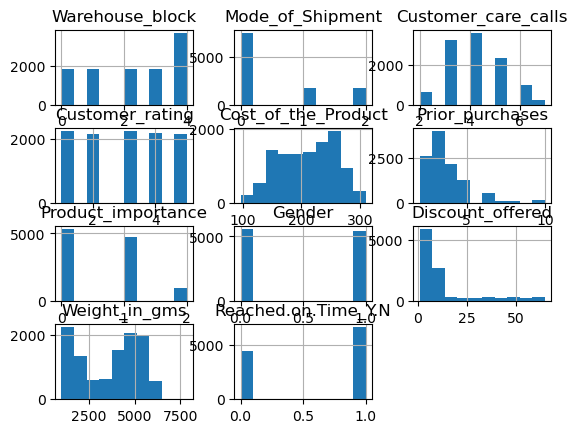

In [675]:
DF.hist();

# Regression

In [676]:
DF.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

# TEST 1 

In [677]:
DF.values

array([[   3,    2,    4, ...,   44, 1233,    1],
       [   4,    2,    4, ...,   59, 3088,    1],
       [   0,    2,    2, ...,   48, 3374,    1],
       ...,
       [   2,    0,    5, ...,    4, 1155,    0],
       [   4,    0,    5, ...,    2, 1210,    0],
       [   3,    0,    2, ...,    6, 1639,    0]])

In [678]:
DF.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [689]:
import pandas as pd
from sklearn import preprocessing
# normalize the data
x = DF[[
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
        'Discount_offered', 'Weight_in_gms']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
DF_X = pd.DataFrame(x_scaled,columns=[
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
        'Discount_offered', 'Weight_in_gms'])
DF_X

,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,0.25,0.378505,0.125,0.671875,0.033893
1,1.00,0.560748,0.000,0.906250,0.304894
2,0.25,0.406542,0.250,0.734375,0.346676
3,0.50,0.373832,0.250,0.140625,0.025712
4,0.25,0.411215,0.125,0.703125,0.216654
...,...,...,...,...,...
10994,0.00,0.728972,0.375,0.000000,0.078451
10995,0.00,0.635514,0.375,0.078125,0.035939
10996,0.75,0.682243,0.375,0.046875,0.022498
10997,0.25,0.593458,0.500,0.015625,0.030533


NameError: name 'peee' is not defined

In [704]:
X = DF_X[[
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
        'Discount_offered', 'Weight_in_gms']]
y = DF['Customer_care_calls']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 =r2_score(y_test, predictions)

print(f'''
     MAE: {mae}
     MSE: {mse}
     RMSE: {rmse}
     R^2: {r2}
''')


     MAE: 0.8319998422158876
     MSE: 1.0556690951280077
     RMSE: 1.027457587994759
     R^2: 0.1755347961879451



/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

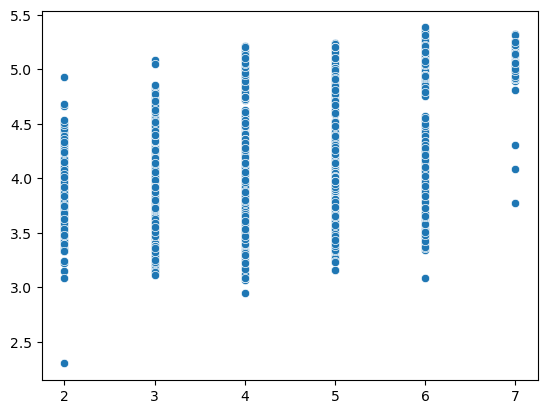

In [705]:
sns.scatterplot(np.array(y_test),model.predict(X_test)
)

In [701]:
# hhh= np.array(y_test)
# print(*hhh)


In [706]:
model.intercept_

4.024782746474705

In [688]:
Coefficient_DF = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
Coefficient_DF

,Coefficient
Customer_care_calls,5.000000e+00
Customer_rating,2.242678e-15
Cost_of_the_Product,-1.372617e-16
Prior_purchases,-1.215363e-15
Discount_offered,-2.312104e-15
Weight_in_gms,-2.238925e-16


In [ ]:
predict=model.predict(X_test)
predict_rounded = np.round(predict)

/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

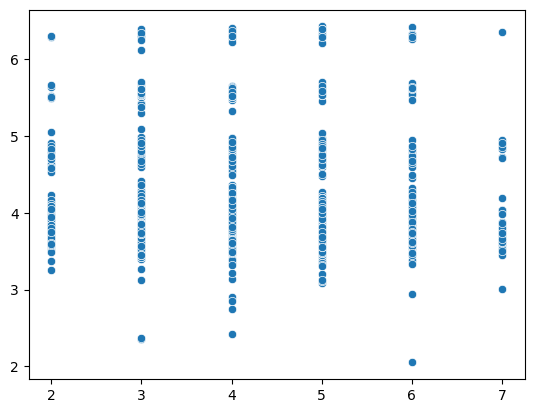

In [703]:
sns.scatterplot(np.array(y_test),predict
)

In [ ]:
real=np.array(y_test)
real

array([4, 3, 3, ..., 3, 2, 3])

In [ ]:
DF.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

# TEST 2 

### from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [707]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 =r2_score(y_test, predictions)

print(f'''
     MAE: {mae}
     MSE: {mse}
     RMSE: {rmse}
     R^2: {r2}
''')


     MAE: 0.765209090909091
     MSE: 0.9322668181818182
     RMSE: 0.9655396512737414
     R^2: 0.29314766214180343



/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

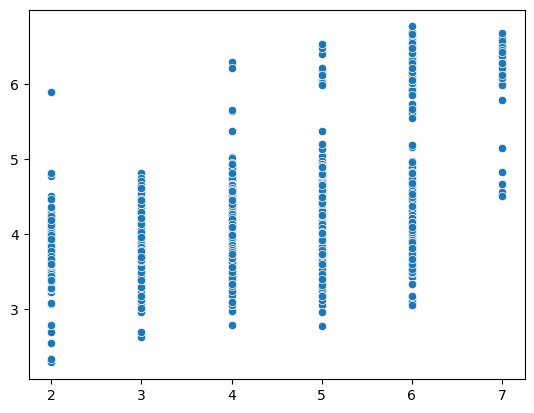

In [ ]:
sns.scatterplot(np.array(y_test),model.predict(X_test)
)

In [ ]:
predict=model.predict(X_test)
predict_rounded = np.round(predict)
predict_rounded

array([4., 4., 4., ..., 4., 4., 4.])

In [ ]:
real

array([4, 3, 3, ..., 3, 2, 3])

# TEST 3 

In [709]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 =r2_score(y_test, predictions)

print(f'''
     MAE: {mae}
     MSE: {mse}
     RMSE: {rmse}
     R^2: {r2}
''')


     MAE: 0.7555964261839193
     MSE: 0.8719382330470107
     RMSE: 0.9337763292389729
     R^2: 0.33888928954991226



/Users/majed-abdulkareem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

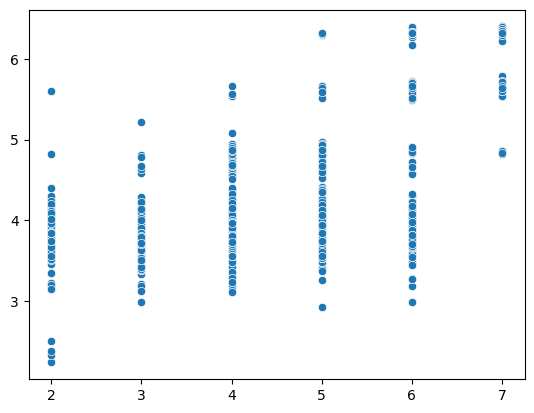

In [710]:
sns.scatterplot(np.array(y_test),model.predict(X_test)
)

In [ ]:
predict=model.predict(X_test)
predict


array([3.63910588, 3.78817244, 4.0790894 , ..., 3.84870319, 3.59220444,
       3.74051285])

In [696]:
real=np.array(y_test)
print(real)

array([1, 0, 1, ..., 0, 1, 1])

# classification 

In [694]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
X = DF[['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms']]
y = DF['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)



In [695]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
confusion_mat = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{confusion_mat}')

Accuracy: 0.6681818181818182
Confusion Matrix:
[[600 299]
 [431 870]]


In [ ]:
predictions

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
y_test

2821    1
4999    0
334     1
5597    1
8880    1
       ..
2301    1
4736    0
4926    0
1928    1
6673    1
Name: Reached.on.Time_Y.N, Length: 2200, dtype: int64

In [ ]:
coefficients = model.coef_.T

# Create a DataFrame to store the coefficients
coefficient_df = pd.DataFrame(coefficients, columns=['Coefficient'], index=X.columns)

# Display the coefficients
print(coefficient_df)

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'